In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.utils import shuffle
from tensorflow.examples.tutorials.mnist import input_data

In [68]:
mnist = input_data.read_data_sets("C:/Users/wjssm/Desktop/0.graduate/2nd/fiancial engineering/MNIST_data", one_hot=True)

Extracting C:/Users/wjssm/Desktop/0.graduate/2nd/fiancial engineering/MNIST_data/train-images-idx3-ubyte.gz
Extracting C:/Users/wjssm/Desktop/0.graduate/2nd/fiancial engineering/MNIST_data/train-labels-idx1-ubyte.gz
Extracting C:/Users/wjssm/Desktop/0.graduate/2nd/fiancial engineering/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting C:/Users/wjssm/Desktop/0.graduate/2nd/fiancial engineering/MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
train_xdata = np.array([np.reshape(x,(28,28,1)) for x in mnist.train.images])
test_xdata = np.array([np.reshape(x,(28,28,1)) for x in mnist.test.images])

train_labels = mnist.train.labels
test_labels = mnist.test.labels

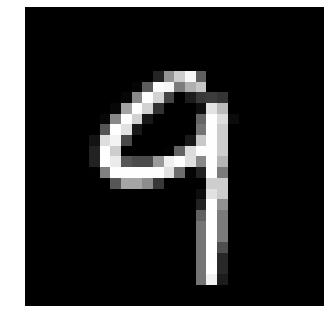

In [70]:
plt.gray()
plt.axis('off')
plt.imshow(train_xdata[8,:,:].reshape(28,28)) #9번째 그림

### Set of Conv layer1

In [0]:
x1 = tf.placeholder(tf.float32, shape = [None, 28,28,1])
f1 = tf.Variable(tf.truncated_normal([4,4,1,32], stddev=0.01)) #filter size 4*4 / the number of filters 32
conv1 = tf.nn.conv2d(input = x1,filter = f1,strides = [1,1,1,1], padding="SAME")
b1 = tf.Variable(tf.zeros([1,1,1,32]))

a1 = tf.nn.relu(conv1+b1) #relu

#pooling
x2 = tf.nn.max_pool(a1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

In [72]:
x2.shape

TensorShape([Dimension(None), Dimension(14), Dimension(14), Dimension(32)])

### Set of Conv layer2

In [0]:
f2 = tf.Variable(tf.truncated_normal([4,4,32,64], stddev=0.01))
conv2 = tf.nn.conv2d(input = x2, filter = f2, strides = [1,1,1,1], padding = 'SAME')
b2 = tf.Variable(tf.zeros([1,1,1,64]))

a2 = tf.nn.relu(conv2+b2) #rellu

#pooling 
x3 = tf.nn.max_pool(a2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

In [13]:
x3.shape

TensorShape([Dimension(None), Dimension(7), Dimension(7), Dimension(64)])

### flatten

In [0]:
myshape = x3.shape
final_shape = int(myshape[1]*myshape[2]*myshape[3])

flat1 = tf.reshape(x3, [-1, final_shape])

In [75]:
flat1.shape

TensorShape([Dimension(None), Dimension(3136)])

### Affine Layer1

In [0]:
num_hidden = 128

In [0]:
x_a1 = flat1
w1 = tf.Variable(initial_value=tf.random_normal((final_shape, num_hidden), mean = 0, stddev = 1.0))
b1 = tf.Variable(tf.zeros(num_hidden))
z1 = tf.matmul(x_a1, w1) + b1
x_a2 = tf.nn.sigmoid(z1)

In [78]:
x_a2.shape

TensorShape([Dimension(None), Dimension(128)])

### Affine Layer2

In [0]:
w2 = tf.Variable(initial_value=tf.random_normal((num_hidden, 10), mean = 0, stddev = 1.0))
b2 = tf.Variable(tf.zeros([1, 10]))
y = tf.nn.softmax(tf.matmul(x_a2,w2)+b2)
t = tf.placeholder(tf.float32, shape=[None, 10]) #true value

In [0]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), axis=1) )
train_step = tf.train.AdamOptimizer().minimize(cross_entropy)

In [88]:
batch_size = 100
num_classes = 10
n_batches = 55000 // batch_size
n_batches

550

In [0]:
sess=tf.Session()
init= tf.global_variables_initializer()
sess.run(init)

In [0]:
# minibatch
for epoch in range(5) :
    X_ , Y_  = shuffle(train_xdata, train_labels)
    
    for i in range(n_batches) :
        start = i*batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict = {x1 : X_[start:end, : ], t: Y_[start:end, :]})

In [91]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={t:test_labels, x1:test_xdata}))

0.9859


In [103]:
fail_index = tf.where(tf.equal(correct_prediction, False))
f_i=sess.run(fail_index[:5],feed_dict={x1: test_xdata, t: test_labels})
f_i

array([[ 96],
       [115],
       [259],
       [320],
       [448]])

##### 예측에 실패한 경우  plot

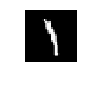

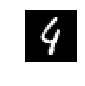

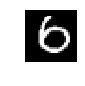

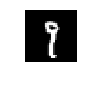

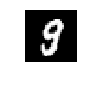

In [104]:
for i in range(len(f_i)) :
  plt.subplot(5,2,i+1)
  plt.axis('off')
  plt.imshow(test_xdata[f_i[i]].reshape([28,28]))
  plt.subplots_adjust(wspace=0.5)
  plt.show()